In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [53]:
data = 'data/cleaned_data.parquet'

In [54]:
df = pd.read_parquet(data)

In [55]:
df.sample(20)

,Title,Artist,ConstituentID,BeginDate,EndDate,Date,Medium,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Height (cm),Width (cm),Nationality,Gender
125503,"Imperial Hotel, Tokyo (Aerial view during cons...",Frank Lloyd Wright,6459,1867-01-01,1959-01-01,1913-01-01,Gelatin silver print,The Frank Lloyd Wright Foundation Archives (Th...,FLW.PH.1509.064,Frank Lloyd Wright Archive,Architecture & Design,1964-10-06,N,204584,Unavailable,Unavailable,11.430023,15.557531,American,Male
69757,East Tenth Street (Anne at the Window),Anne Goldthwaite,2221,1869-01-01,1944-01-01,1928-01-01,Etching,Gift of Abby Aldrich Rockefeller,908.1940,Print,Drawings & Prints,1940-04-05,Y,74727,http://www.moma.org/collection/works/74727,http://www.moma.org/media/W1siZiIsIjI3NTEyNSJd...,25.200000,20.000000,American,Female
136835,A Conspiracy,Carolyn Lazard,133042,1987-01-01,1927-01-01,2017-01-01,Dohm white noise machines,Fund for the Twenty-First Century,210.2020,Installation,Media and Performance,2020-11-12,Y,419360,http://www.moma.org/collection/works/419360,http://www.moma.org/media/W1siZiIsIjQ5NjgzMyJd...,0.000000,0.000000,French,undisclosed
62597,The Hen with the Golden Eggs,Marc Chagall,1055,1887-01-01,1985-01-01,1952-01-01,Etching and engraving over photogravure,Larry Aldrich Fund,315.1958.1-6,Print,Drawings & Prints,1958-12-19,N,66750,Unavailable,Unavailable,0.000000,0.000000,French,Male
505,"Civic Center Studies, project, Philadelphia, P...",Louis I. Kahn,2964,1901-01-01,1974-01-01,1964-01-01,Ink on tracing paper,Gift of the architect,414.1964,Architecture,Architecture & Design,1964-04-14,Y,581,http://www.moma.org/collection/works/581,http://www.moma.org/media/W1siZiIsIjUxOTI3NyJd...,22.225000,36.830100,American,Male
34885,Stocks,Chryssa,1118,1933-01-01,2013-01-01,1960-01-01,"Synthetic polymer paint, pencil, and pastel on...",Gift of Norman Alexander,474.1977,Drawing,Drawings & Prints,1977-11-02,Y,37086,http://www.moma.org/collection/works/37086,http://www.moma.org/media/W1siZiIsIjM4NzkyOCJd...,94.000000,58.700000,American,Female
134108,MARS - Modular Artificial Reef Structure,Alex Goad,131403,1989-01-01,1927-01-01,2013-01-01,"Ceramic, marine concrete, and steel",Gift of the designer,162.2019,Design,Architecture & Design,2019-11-04,Y,395559,http://www.moma.org/collection/works/395559,Unavailable,44.873423,44.873423,Australian,Male
100506,Break the Silence from Break the Silence!,Carmen Perrin,38206,1953-01-01,1927-01-01,2000-01-01,Printed paper with straight pins from a portfo...,General Print Fund,1110.2007.21,Print,Drawings & Prints,2007-11-12,Y,136215,http://www.moma.org/collection/works/136215,http://www.moma.org/media/W1siZiIsIjIzOTA5OSJd...,0.000000,0.000000,Peruvian,Female
137018,Sleepers (Les Dormeurs),Sophie Calle,6655,1953-01-01,1927-01-01,1979-01-01,Gelatin silver print,Acquired through the generosity of Clarissa A....,253.2019.20,Photograph,Photography,2019-11-12,Y,421004,http://www.moma.org/collection/works/421004,http://www.moma.org/media/W1siZiIsIjUwNzE4NCJd...,15.875032,20.955042,French,Female
15759,Khudozhestvennoe oformlenie massovykh prazdnes...,"Various Artists, Leonid Akishin, Natan Al'tman...","24409, 24145, 11947, 325, 23503, 24146, 24147,...",1857-01-01,1927-01-01,1932-01-01,"48 photomechanical reproductions, 30 of works ...",Gift of The Judith Rothschild Foundation,425.2001.1-49,Illustrated Book,Drawings & Prints,2001-01-24,N,17000,Unavailable,Unavailable,14.800000,10.400000,Russian,undisclosed


<Axes: >

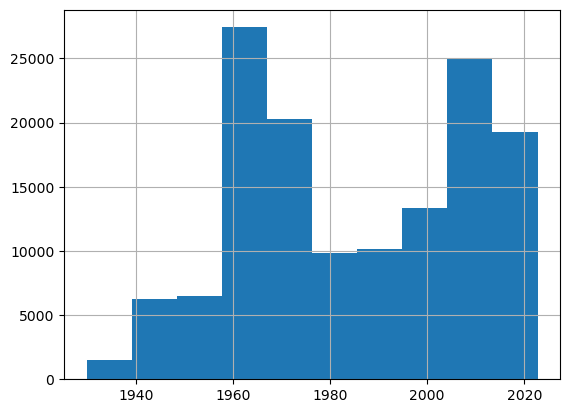

In [56]:
df['DateAcquired'].hist()

In [57]:
(df['EndDate'] > df['DateAcquired']).sum()

41655

In [58]:
(df['Date'] > df['DateAcquired']).sum()

1469

<Axes: >

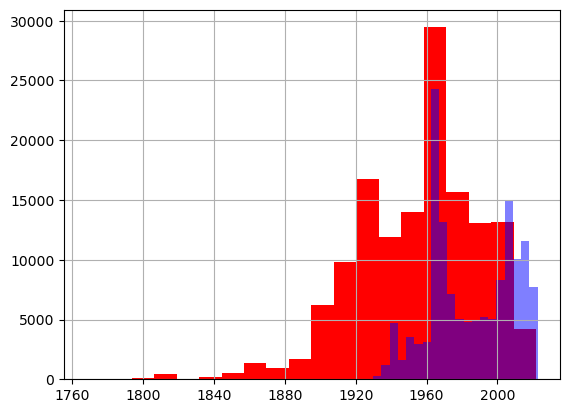

In [59]:
df['Date'].hist(bins=20, color='red')
df['DateAcquired'].hist(bins=20, color='blue', alpha=0.5)

In [60]:
df['date_difference'] = df['DateAcquired'] - df['Date']

In [61]:
df

,Title,Artist,ConstituentID,BeginDate,EndDate,Date,Medium,CreditLine,AccessionNumber,Classification,...,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Height (cm),Width (cm),Nationality,Gender,date_difference
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,1841-01-01,1918-01-01,1896-01-01,Ink and cut-and-pasted painted pages on paper,Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,...,1996-04-09,Y,2,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjUyNzc3MCJd...,48.6000,168.9000,Austrian,Male,36623 days
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,1944-01-01,1927-01-01,1987-01-01,Paint and colored pencil on print,Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,...,1995-01-17,Y,3,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjUyNzM3NCJd...,40.6401,29.8451,French,Male,2938 days
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,1876-01-01,1957-01-01,1903-01-01,"Graphite, pen, color pencil, ink, and gouache ...",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,...,1997-01-15,Y,4,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjUyNzM3NSJd...,34.3000,31.8000,Austrian,Male,34348 days
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1944-01-01,1927-01-01,1980-01-01,Photographic reproduction with colored synthet...,Purchase and partial gift of the architect in ...,2.1995,Architecture,...,1995-01-17,Y,5,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjUyNzQ3NCJd...,50.8000,50.8000,American,Male,5495 days
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,1876-01-01,1957-01-01,1903-01-01,"Graphite, color pencil, ink, and gouache on tr...",Gift of Jo Carole and Ronald S. Lauder,2.1997,Architecture,...,1997-01-15,Y,6,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjUyNzQ3NSJd...,38.4000,19.1000,Austrian,Male,34348 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139627,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,1923-01-01,2015-01-01,1954-01-01,Page from a spiral-bound sketchbook with penci...,Gift of Jack Shear,346.2020.30,Drawing,...,2020-12-09,N,440436,Unavailable,Unavailable,30.8000,22.5000,American,Male,24449 days
139628,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,1923-01-01,2015-01-01,1954-01-01,Page from a spiral-bound sketchbook with penci...,Gift of Jack Shear,346.2020.31,Drawing,...,2020-12-09,N,440437,Unavailable,Unavailable,30.8000,22.5000,American,Male,24449 days
139629,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,1923-01-01,2015-01-01,1954-01-01,Page from a spiral-bound sketchbook with penci...,Gift of Jack Shear,346.2020.32,Drawing,...,2020-12-09,N,440438,Unavailable,Unavailable,30.8000,22.5000,American,Male,24449 days
139630,"Front cover of Sketchbook #24, New York City",Ellsworth Kelly,3048,1923-01-01,2015-01-01,1954-01-01,"Spiral-bound sketchbook with pencil, ballpoint...",Gift of Jack Shear,346.2020.1,Drawing,...,2020-12-09,N,440439,Unavailable,Unavailable,30.8000,22.5000,American,Male,24449 days


In [62]:
df.corr()

/var/folders/by/7zf7bnfn5x31kvfd7xxnlz5c0000gn/T/ipykernel_47918/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ObjectID,Height (cm),Width (cm)
ObjectID,1.000000,-0.010969,0.003937
Height (cm),-0.010969,1.000000,0.435351
Width (cm),0.003937,0.435351,1.000000


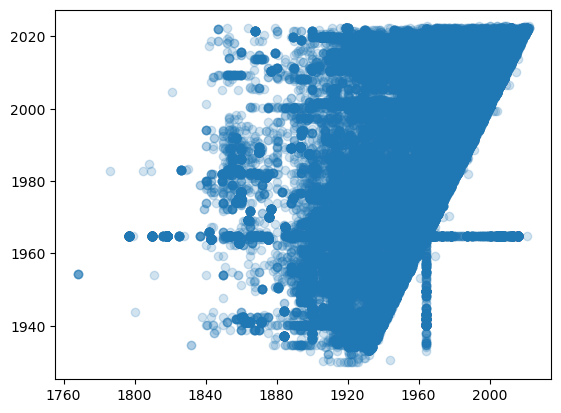

In [63]:
plt.scatter(x=df['Date'], y=df['DateAcquired'], alpha=0.2, )

In [66]:
chi2_contingency(pd.crosstab(df.Date, df.DateAcquired))

Chi2ContingencyResult(statistic=3283836.6841306095, pvalue=0.0, dof=352512, expected_freq=array([[3.22275696e-04, 7.16168214e-05, 7.16168214e-05, ...,
        3.58084107e-05, 4.65509339e-04, 4.29700928e-04],
       [6.44551392e-05, 1.43233643e-05, 1.43233643e-05, ...,
        7.16168214e-06, 9.31018678e-05, 8.59401856e-05],
       [5.15641114e-03, 1.14586914e-03, 1.14586914e-03, ...,
        5.72934571e-04, 7.44814942e-03, 6.87521485e-03],
       ...,
       [5.60759711e-03, 1.24613269e-03, 1.24613269e-03, ...,
        6.23066346e-04, 8.09986250e-03, 7.47679615e-03],
       [4.89859058e-03, 1.08857568e-03, 1.08857568e-03, ...,
        5.44287842e-04, 7.07574195e-03, 6.53145411e-03],
       [3.86730835e-04, 8.59401856e-05, 8.59401856e-05, ...,
        4.29700928e-05, 5.58611207e-04, 5.15641114e-04]]))

In [67]:
pd.crosstab(df.Date, df.DateAcquired)

DateAcquired,1929-11-19,1930-01-12,1930-04-02,1930-06-08,1930-10-23,1931-01-15,1931-01-19,1931-03-11,1932-01-01,1932-02-24,...,2022-03-03,2022-04-04,2022-04-28,2022-05-16,2022-05-19,2022-05-24,2022-05-25,2022-05-27,2022-06-06,2022-09-20
Date,,,,,,,,,,,,,,,,,,,,,
1768-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1786-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1797-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1799-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1800-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,14,0,0,0
2019-01-01,0,0,0,0,0,0,0,0,0,0,...,1,0,6,0,0,1,7,0,2,0
2020-01-01,0,0,0,0,0,0,0,0,0,0,...,1,2,8,0,0,2,1,0,0,1
